# 이진 탐색

* 순차 탐색: 배열 내 데이터를 찾기 위해, 앞에서부터 데이터를 하나씩 확인
* 이진 탐색: **정렬된** 리스트에서 **탐색 범위를 절반씩 좁혀가며** 데이터를 탐색
    * 인덱스 - 시작점, 끝점, 중간점을 이용하여 탐색 범위를 설정

## 시간 복잡도
* 단계마다 탐색 범위를 2로 나눔 -> 연산 횟수는 $log_2N$에 비례
* $O(log_2 N)$

In [ ]:
# 재귀적 구현
def binary_search(array, target, start, end):
    # 데이터 없음
    if start > end:
        return None
    mid = (start + end) // 2

    # 찾은 경우 중간점 인덱스 반환
    if array[mid] == target:
        return mid
    # 중간점의 값보다 찾고자 하는 값이 작은 경우
    elif array[mid] > target:
        return binary_search(array, target, start, mid - 1)
    # 중간점의 값보다 찾고자 하는 값이 큰 경우
    else:
        return binary_search(array, target, mid + 1, end)

target = 7
array = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
result = binary_search(array, target, 0, len(array) - 1)

if result == None:
    print("원소가 존재하지 않습니다.")
else:
    print(result + 1)

4


In [ ]:
# 반복문 구현
def binary_search(array, target, start, end):
    while start <= end:
        mid = (start + end) // 2

        # 찾은 경우 중간점 인덱스 반환
        if array[mid] == target:
            return mid
        # 중간점의 값보다 찾고자 하는 값이 작은 경우 왼쪽 확인
        elif array[mid] > target:
            end = mid - 1
        # 중간점의 값보다 찾고자 하는 값이 큰 경우 오른쪽 확인
        else:
            start = mid + 1
    # 데이터 없음
    return None

target = 7
array = [1, 3, 5, 6, 9, 11, 13, 15, 17, 19]
result = binary_search(array, target, 0, len(array) - 1)

if result == None:
    print("원소가 존재하지 않습니다.")
else:
    print(result + 1)

원소가 존재하지 않습니다.


## 파이썬 이진탐색 라이브러리
* `bisect_left(a, x)`: 정렬된 순서를 유지하면서 배열 a에 x를 삽입할 가장 왼쪽 인덱스를 반환
* `bisect_right(a, x)`: 정렬된 순서를 유지하면서 배열 a에 x를 삽입할 가장 오른쪽 인덱스를 반환

In [ ]:
from bisect import bisect_left, bisect_right

a = [1, 2, 4, 4, 8]
x = 4

print(bisect_left(a, x))
print(bisect_right(a, x))

2
4


In [ ]:
from bisect import bisect_left, bisect_right

# 값이 [left_value, right_value]인 데이터의 개수
def count_by_range(a, left_value, right_value):
    right_index = bisect_right(a, right_value)
    left_index = bisect_left(a, left_value)
    return right_index - left_index

a = [1, 2, 3, 3, 3, 3, 4, 4, 8, 9]

# 값이 [4, 4] 범위에 있는, 즉 4인 데이터 개수
print(count_by_range(a, 4, 4))

# 값이 [-1, 3] 범위에 있는 데이터 개수
print(count_by_range(a, -1, 3))

2
6


## 파라메트릭 서치
* 최적화 문제를 결정 문제(예 / 아니오)로 바꾸어 해결하는 기법
    * 함수의 값을 가능한 높이거나, 가능한 낮추는 등의 문제
* 이진 탐색을 이용해 해결 가능

# [문제] 떡볶이 떡 만들기

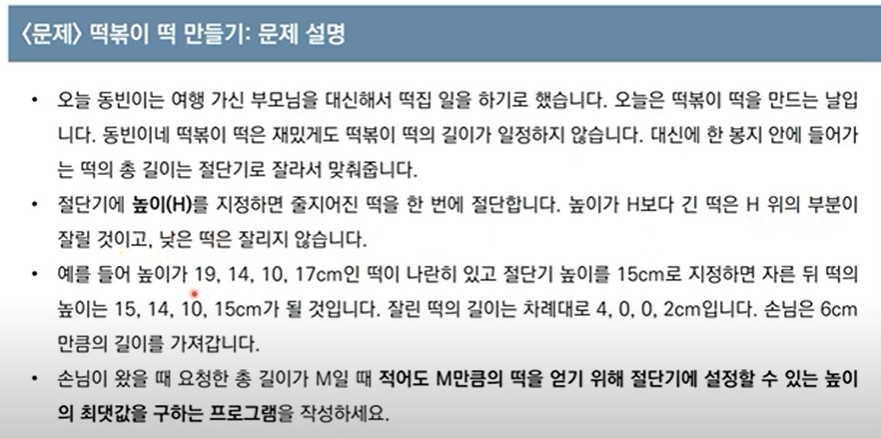

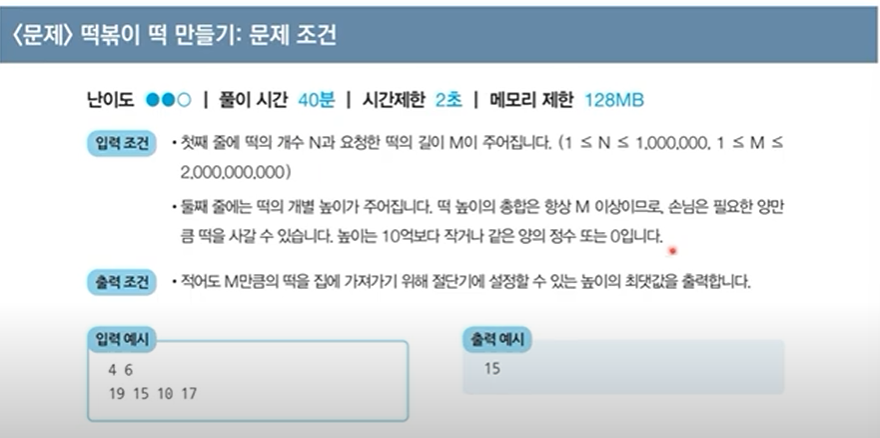


* 절단기 높이가 커질수록, 잘린 떡의 길이는 감소한다. 절단기 높이가 작아질수록, 잘린 떡의 길이는 증가한다.

* $M$만큼의 떡을 얻을 수 있으면, 절단기의 높이를 줄여서 탐색한다. $M$만큼의 떡을 얻을 수 있으면, 절단기의 높이을 늘려서 탐색한다.

* 탐색 범위가 0부터 10억... 넓은 만큼 이진 탐색을 떠올리는 것이 좋다.

In [ ]:
N, M = map(int, input().split())
tteoks = list(map(int, input().split()))

# 반복문으로 구현
left = 0 # 설정 가능한 최저 높이
right = max(tteoks) # 설정 가능한 최고 높이
answer = 0 @ 정답

while left <= right:
    # 현재 절단기 높이
    mid = (left + right) // 2
    print(f"절단기 높이가 ({left} + {right}) // 2 = {mid}일 때")

    # 절단해서 얻은 길이 계산: (각 떡 길이 - 절단기 높이)의 절대값 합
    tteok_length = 0
    for t in tteoks:
        tteok_length += max(0, t - mid) # 떡 길이보다 절단기 높이가 긴 경우, 0 추가

    print(f"절단해서 얻은 떡의 길이는 {tteok_length}")

    # 길이가 M보다 짧은 경우 -> 절단기 길이를 줄여야 함
    if tteok_length < M:
        right = mid - 1
        print(f"길이가 {M} 미만이므로, 절단기 길이를 줄여야 함")

    # 길이가 M보다 길거나 같은 경우 -> 절단기 길이를 늘려야 함
    else:
        answer = mid # 매번 높이 최댓값을 기록
        left = mid + 1
        print(f"길이가 {M} 이상이므로, 정답으로 {mid}을 저장하고 절단기 길이를 늘림")
    print()
print(f"{left} > {right} 이므로, 반복문을 종료")

print(answer)

절단기 높이가 (0 + 19) // 2 = 9일 때
절단해서 얻은 떡의 길이는 25
길이가 6 이상이므로, 정답으로 9을 저장하고 절단기 길이를 늘림

절단기 높이가 (10 + 19) // 2 = 14일 때
절단해서 얻은 떡의 길이는 9
길이가 6 이상이므로, 정답으로 14을 저장하고 절단기 길이를 늘림

절단기 높이가 (15 + 19) // 2 = 17일 때
절단해서 얻은 떡의 길이는 2
길이가 6 미만이므로, 절단기 길이를 줄여야 함

절단기 높이가 (15 + 16) // 2 = 15일 때
절단해서 얻은 떡의 길이는 6
길이가 6 이상이므로, 정답으로 15을 저장하고 절단기 길이를 늘림

절단기 높이가 (16 + 16) // 2 = 16일 때
절단해서 얻은 떡의 길이는 4
길이가 6 미만이므로, 절단기 길이를 줄여야 함

16 > 15 이므로, 반복문을 종료
15


# [문제] 정렬된 배열에서 특정 수의 개수 구하기


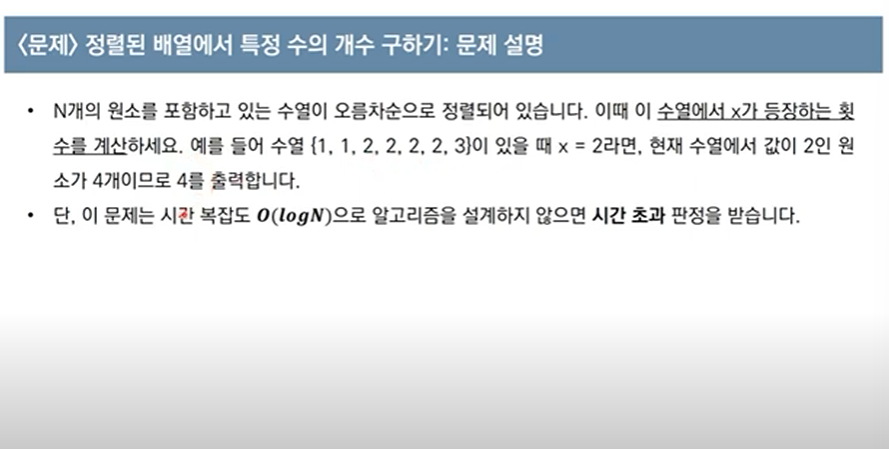

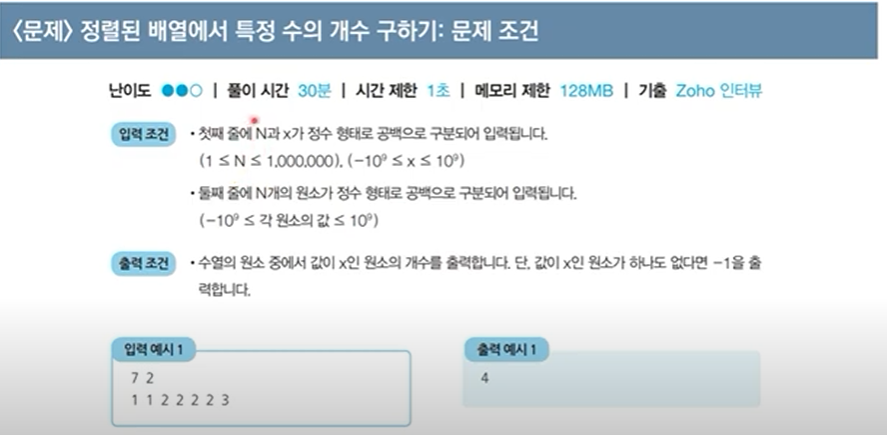

* $O(log N)$: 선형 탐색으로는 시간 초과
* 데이터가 정렬되어 있으므로, 이진 탐색 수행 가능

In [ ]:
from bisect import bisect_left, bisect_right

N, x = map(int, input().split())
nums = list(map(int, input().split()))

left_i = bisect_left(nums, x)
right_i = bisect_right(nums, x)

if right_i == left_i:
    print(-1)
else:
    print(right_i - left_i)

4


# 같이 풀어볼 문제

* 10816번 - 숫자 카드 2 (실버 IV)
https://www.acmicpc.net/problem/10816

* 1654번 - 랜선 자르기 (실버 II)
https://www.acmicpc.net/problem/1654

